In [2]:
#/////////////////////////////////////////////////////////////////////////////////////////////////// <imports nécessaires> ////

import pickle
import numpy as np
import matplotlib.pyplot as plt
import decisiontree
from decisiontree import DecisionTree
from collections import Counter

#////////////////////////////////////////////////////////////////////////////////////////////////// </imports nécessaires> ////

In [7]:
#///////////////////////////////////////////////////////////////////////////////////////////////////// <notion d'entropie> ////

# ··· L'entropie permet de mesurer le degré d'hétérogénéité d'un vecteur.
# On l'utilisera pour quantifier l'intérêt discriminatoire d'un attribut.

def entropy(vect):
    # Calculer l'entropie du vecteur 'vect'.
    entropy = 0
    length = vect.size
    if length <= 1: return 0
    probas = np.array(list(Counter(vect).values())) / length
    for p in probas: entropy += p * np.log2(p)
    return -entropy

def entropy_cond(list_vect):
    # Calculer l'entropie conditionnelle d'une partition de vecteurs.
    res = 0
    total_length = 0
    for v in list_vect:
        length = v.size
        res += length * entropy(v)
        total_length += length
    return res / total_length

vect = np.array([1, 2, 3, 3, 4, 4, 4])
print("Entropie du premier vecteur :", vect, np.around(entropy(vect),decimals=4)) # => 1.8424
print("Entropie attendue :", vect, np.around(decisiontree.entropy(vect),decimals=4)) # => 1.8424

vect2 = np.array([1, 2, 3, 3, 5, 2, 1])
print("Entropie conditionnelle du deuxième vecteur :", vect2, np.around(entropy_cond([vect, vect2]),decimals=4)) # => 1.8963
print("Entropie conditionnelle attendue :", vect2, np.around(decisiontree.entropy_cond([vect, vect2]),decimals=4)) # => 1.8963

# Tout va bien.

#//////////////////////////////////////////////////////////////////////////////////////////////////// </notion d'entropie> ////

Entropie du premier vecteur : [1 2 3 3 4 4 4] 1.8424
Entropie attendue : [1 2 3 3 4 4 4] 1.8424
Entropie conditionnelle du deuxième vecteur : [1 2 3 3 5 2 1] 1.8963
Entropie conditionnelle attendue : [1 2 3 3 5 2 1] 1.8963


In [8]:
#//////////////////////////////////////////////////////////////////////////////////////////////////// <prise en main IMDb> ////

# ··· Tests de vérification et entropies pour la base IMDb.
# ··· Elle est divisée en trois parties : les données dans data (films,features), 
#                                         un dictionnaire id>titre dans id2title,
#                                         un dictionnaire idfeature>nom dans fields
# ··· Dans data : 34 colonnes et 4587 lignes.
#                 Colonnes 0 à 27 : genres
#                 Colonne 28 : durée
#                 Colonne 29 : couleur
#                 Colonne 30 : année
#                 Colonne 31 : budget
#                 Colonne 32 : nb de votes
#                 Colonne 33 : note moyenne

[data, id2titles, fields] = pickle.load(open('imdb_extrait.pkl', 'rb'))   
datax = data[:,:32] 
# Binarisation de la note moyenne.
# 1 si le score du film est supérieur à 6.5, -1 sinon
datay = np.array([1 if x[33] > 6.5 else -1 for x in data])

# Calcul des entropies pour chaque attribut.
nb_genres = 28
# Entropie brute des attributs.
ent = entropy(datay) 
# Entropie conditionnelle de chacun des attributs.
ent_cond = np.zeros(nb_genres) 
for genre in range(nb_genres):
    ent_cond[genre] = entropy_cond([datay[datax[:, genre] == 1], 
                                    datay[datax[:, genre] != 1]])

print('Entropie totale = {}'.format(np.around(ent,decimals=4))) # => 0.9869
print("\nEntropie conditionnelle par attribut\n", (np.around(ent_cond,decimals=4)))

# Différence entre les entropies pour chaque attribut.
# C'est ce qu'on appelle le gain d'information.
igain = ent-ent_cond
print("\nGains d'information par attribut\n", np.around(igain,decimals=4))
print("Genre où la différence est maximale,", fields[igain.argmax()]) # => 17
print("- la différence en question étant de", np.around(max(igain),decimals=4)) # => 0.0607

#/////////////////////////////////////////////////////////////////////////////////////////////////// </prise en main IMDb> ////

Entropie totale = 0.9869

Entropie conditionnelle par attribut
 [0.9809 0.9862 0.9869 0.9847 0.9869 0.9709 0.9778 0.9642 0.9833 0.9869
 0.9869 0.9869 0.9755 0.9849 0.9868 0.9864 0.9869 0.9262 0.9705 0.9857
 0.9844 0.9733 0.985  0.9866 0.9846 0.9869 0.9869 0.9658]

Gains d'information par attribut
 [0.006  0.0007 0.     0.0022 0.     0.016  0.0091 0.0227 0.0036 0.
 0.     0.     0.0115 0.002  0.0001 0.0005 0.     0.0607 0.0164 0.0013
 0.0025 0.0136 0.0019 0.0003 0.0023 0.     0.     0.0211]
Genre où la différence est maximale, Drama
- la différence en question étant de 0.0607


In [8]:
#///////////////////////////////////////////////////////////////////////////////////////////// <expériences préliminaires> ////

# ··· L'objet DecisionTree est déjà implémenté dans le code source fourni.

dt = DecisionTree()
# Taille de l'arbre de décision.
dt.max_depth = 5 
# Nombre minimum d'exemples pour diviser un noeud.
dt.min_samples_split = 2

# Apprentissage et prédiction.
dt.fit(datax, datay)
dt.predict(datax[:5,:])
print('Depth: {} - Score: {}'.format(dt.max_depth, dt.score(datax, datay))) 

# Dessiner l’arbre dans un fichier pdf si pydot est installé.
# filename = 'imdb_tree_d{}_s{}.pdf'.format(dt.max_depth, dt.min_samples_split)
# dt.to_pdf(filename, fields)

# Si pydot n'est pas installé, utiliser http://www.webgraphviz.com/, 
# print(dt.to_dot(fields))
# ou dans la console, même si moyennement lisible
print(dt.print_tree(fields))

#//////////////////////////////////////////////////////////////////////////////////////////// </expériences préliminaires> ////

Depth: 5 - Score: 0.736429038587312
var Drama :  > 0.500000 
	var budget :  > 15660000.000000 
		var Duree :  > 115.500000 
			var budget :  > 36500000.000000 
				var Duree :  > 137.500000 
					class : 1 {1: 101, -1: 20}
				var Duree :  <= 137.500000 
					class : 1 {-1: 94, 1: 109}
			var budget :  <= 36500000.000000 
				var Sci-Fi :  > 0.500000 
					class : -1 {-1: 5, 1: 4}
				var Sci-Fi :  <= 0.500000 
					class : 1 {1: 252, -1: 31}
		var Duree :  <= 115.500000 
			var Biography :  > 0.500000 
				var annee :  > 2011.500000 
					class : -1 {-1: 2}
				var annee :  <= 2011.500000 
					class : 1 {1: 24, -1: 2}
			var Biography :  <= 0.500000 
				var Thriller :  > 0.500000 
					class : -1 {-1: 162, 1: 66}
				var Thriller :  <= 0.500000 
					class : -1 {1: 135, -1: 149}
	var budget :  <= 15660000.000000 
		var annee :  > 1973.500000 
			var Duree :  > 104.500000 
				var budget :  > 11158052.500000 
					class : 1 {1: 131, -1: 39}
				var budget :  <= 11158052.500000 
					

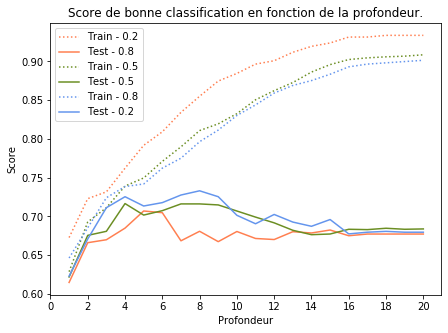

In [10]:
#//////////////////////////////////////////////////////////////////////////////////////////// <arbres et surapprentissage> ////

# ··· De quoi constater le surapprentissage qui apparaît très vite en approfondissant l'arbre.

max_depth = 20
depths = np.array(range(1, max_depth+1)) # abscisses
scores_train = np.zeros(depths.shape) # ordonnées
scores_test = np.zeros(depths.shape) # ordonnées

divisions = [0.2, 0.5, 0.8] # séparation
colors = ["coral","olivedrab","cornflowerblue"]

plt.figure(figsize=(7,5))
for j, d in enumerate(divisions):
    div = int(d * data.shape[0]) # index de séparation
    # Mélange des données pour une plus grande fiabilité
    np.random.shuffle(data) 
    datax = data[:,:32]
    datay = np.array([1 if x[33] > 6.5 else -1 for x in data])
    # Séparation des données en deux ensembles train et test
    datax_train = datax[:div]
    datax_test = datax[div:]
    datay_train = datay[:div]
    datay_test = datay[div:]
    for i, depth in enumerate(depths):
        # Apprentissage
        dt = DecisionTree()
        dt.max_depth = depth
        dt.min_samples_split = 2
        dt.fit(datax_train, datay_train)
        # Calcul des scores
        scores_train[i] = dt.score(datax_train, datay_train)
        scores_test[i] = dt.score(datax_test, datay_test)      
    # Traçage des courbes    
    plt.plot(depths, scores_train, color=colors[j], label='Train - {}'.format(d), linestyle=':')
    plt.plot(depths, scores_test, color=colors[j], label='Test - {}'.format(np.around(1-d,decimals=1)))
    
# Affichage du graphe
plt.title('Score de bonne classification en fonction de la profondeur.')
plt.xticks(np.arange(0,22,2))
plt.xlabel('Profondeur')
plt.ylabel('Score')
plt.legend()
plt.show()

#/////////////////////////////////////////////////////////////////////////////////////////// </arbres et surapprentissage> ////

> Nb de partitions : 5
>> Partition n° 1
>> Partition n° 2
>> Partition n° 3
>> Partition n° 4
>> Partition n° 5


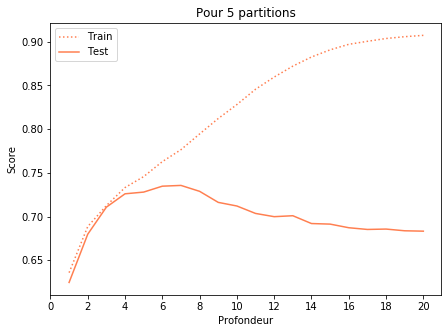

> Nb de partitions : 10
>> Partition n° 1
>> Partition n° 2
>> Partition n° 3
>> Partition n° 4
>> Partition n° 5
>> Partition n° 6
>> Partition n° 7
>> Partition n° 8
>> Partition n° 9
>> Partition n° 10


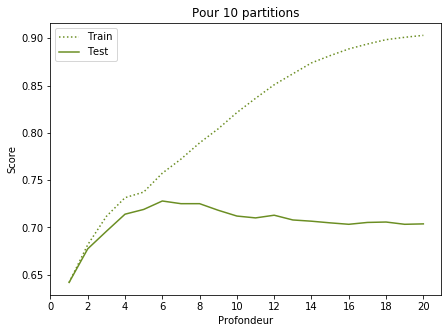

> Nb de partitions : 20
>> Partition n° 1
>> Partition n° 2
>> Partition n° 3
>> Partition n° 4
>> Partition n° 5
>> Partition n° 6
>> Partition n° 7
>> Partition n° 8
>> Partition n° 9
>> Partition n° 10
>> Partition n° 11
>> Partition n° 12
>> Partition n° 13
>> Partition n° 14
>> Partition n° 15
>> Partition n° 16
>> Partition n° 17
>> Partition n° 18
>> Partition n° 19
>> Partition n° 20


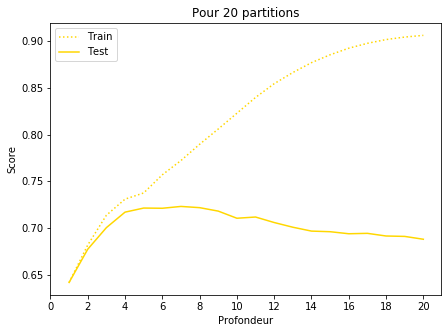

> Nb de partitions : 40
>> Partition n° 1
>> Partition n° 2
>> Partition n° 3
>> Partition n° 4
>> Partition n° 5
>> Partition n° 6
>> Partition n° 7
>> Partition n° 8
>> Partition n° 9
>> Partition n° 10
>> Partition n° 11
>> Partition n° 12
>> Partition n° 13
>> Partition n° 14
>> Partition n° 15
>> Partition n° 16
>> Partition n° 17
>> Partition n° 18
>> Partition n° 19
>> Partition n° 20
>> Partition n° 21
>> Partition n° 22
>> Partition n° 23
>> Partition n° 24
>> Partition n° 25
>> Partition n° 26
>> Partition n° 27
>> Partition n° 28
>> Partition n° 29
>> Partition n° 30
>> Partition n° 31
>> Partition n° 32
>> Partition n° 33
>> Partition n° 34
>> Partition n° 35
>> Partition n° 36
>> Partition n° 37
>> Partition n° 38
>> Partition n° 39
>> Partition n° 40


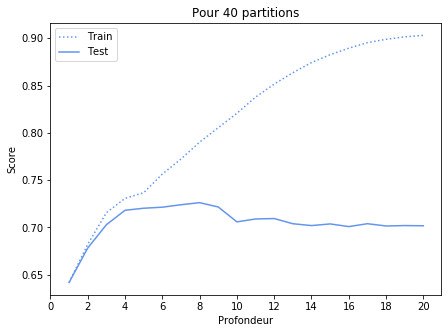

In [36]:
#////////////////////////////////////////////////////////////////////////////////////// <sélection par validation croisée> ////

# ··· Une validation croisée est-elle plus fiable avec un plus grand nombre de partitions ? (non)

def partition(data_size, n):
    # Étant donnée la taille d'un ensemble, retourne la liste des index 
    # permettant de diviser cet ensemble en n sous-ensembles de taille similaire.
    # Calcul des tailles des sous-ensembles
    size = data_size//n # taille moyenne d'une partie
    remainder = data_size%n
    parts_size = [size+1 if i<remainder else size for i in range(n)]
    # Index de début de chacun des ss-ensembles
    parts_index = [sum(parts_size[:i]) for i in range(len(parts_size) + 1)]
    return parts_index

colors = ["coral","olivedrab","pink","cornflowerblue"]

max_depth = 20
depths = np.array(range(1, max_depth+1)) # abscisses   
N = [5, 10, 20, 40] # nombre de parties

# Sélection des données utiles.
np.random.shuffle(data)
datax = data[:, :32]
# Binarisation pour faire ressortir les meilleures notes.
datay = np.array([1 if x[33] > 6.5 else -1 for x in data])

for k, n in enumerate(N):
    scores_train = np.zeros(depths.shape) # ordonnées
    scores_test = np.zeros(depths.shape) # ordonnées
    parts_index = partition(data.shape[0],n)
    print('> Nb de partitions :', n)
    for j in range(n):
        print('>> Partition n°', j+1)
        # Séparation des données en deux ensembles train et test
        datax_train = np.concatenate([datax[:parts_index[j]], 
                                      datax[parts_index[j+1]:]], axis=0)
        datay_train = np.concatenate([datay[:parts_index[j]], 
                                      datay[parts_index[j+1]:]], axis=0)
        datax_test = datax[parts_index[j]:parts_index[j+1]]
        datay_test = datay[parts_index[j]:parts_index[j+1]]
        for i, depth in enumerate(depths):
            # Apprentissage
            dt = DecisionTree()
            dt.max_depth = depth
            dt.min_samples_split = 2
            dt.fit(datax_train, datay_train)
            # Calcul des scores
            scores_train[i] += dt.score(datax_train, datay_train) / n
            scores_test[i] += dt.score(datax_test, datay_test) / n
    # Traçage des courbes
    plt.figure(figsize=(7,5))
    plt.plot(depths, scores_train, label='Train', linestyle=':',color=colors[k])
    plt.plot(depths, scores_test, label='Test',color=colors[k])
    # Affichage du graphe
    plt.title('Pour {} partitions'.format(n))
    plt.xticks(np.arange(0, 22, 2))
    plt.xlabel('Profondeur')
    plt.ylabel('Score')
    plt.legend()
    plt.show()
    
#///////////////////////////////////////////////////////////////////////////////////// </sélection par validation croisée> ////